Epoch [1/50] | d_loss: 0.5027 | g_loss: 1.5431
Epoch [2/50] | d_loss: 0.8281 | g_loss: 1.3064
Epoch [3/50] | d_loss: 1.1263 | g_loss: 0.9701
Epoch [4/50] | d_loss: 1.6165 | g_loss: 0.7187
Epoch [5/50] | d_loss: 0.8154 | g_loss: 1.3562
Epoch [6/50] | d_loss: 0.7306 | g_loss: 1.3175
Epoch [7/50] | d_loss: 0.7895 | g_loss: 1.1721
Epoch [8/50] | d_loss: 1.3546 | g_loss: 0.9297
Epoch [9/50] | d_loss: 1.1012 | g_loss: 1.3700
Epoch [10/50] | d_loss: 1.1236 | g_loss: 0.9184


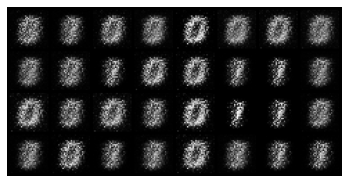

Epoch [11/50] | d_loss: 1.7550 | g_loss: 0.6547
Epoch [12/50] | d_loss: 1.2422 | g_loss: 1.0702
Epoch [13/50] | d_loss: 1.0667 | g_loss: 1.2047
Epoch [14/50] | d_loss: 0.9731 | g_loss: 0.9343
Epoch [15/50] | d_loss: 1.1872 | g_loss: 1.0035
Epoch [16/50] | d_loss: 1.1460 | g_loss: 0.9545
Epoch [17/50] | d_loss: 0.7251 | g_loss: 1.4227
Epoch [18/50] | d_loss: 0.9490 | g_loss: 1.3923
Epoch [19/50] | d_loss: 0.7318 | g_loss: 1.4820
Epoch [20/50] | d_loss: 0.6359 | g_loss: 1.6968


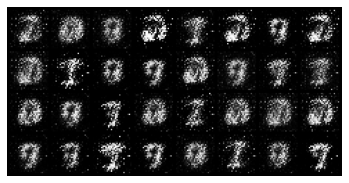

Epoch [21/50] | d_loss: 1.0997 | g_loss: 1.3107
Epoch [22/50] | d_loss: 1.3373 | g_loss: 1.2061
Epoch [23/50] | d_loss: 1.0783 | g_loss: 1.0501
Epoch [24/50] | d_loss: 1.1148 | g_loss: 1.1030
Epoch [25/50] | d_loss: 0.9265 | g_loss: 1.4984
Epoch [26/50] | d_loss: 1.0027 | g_loss: 0.9992
Epoch [27/50] | d_loss: 0.8542 | g_loss: 1.6241
Epoch [28/50] | d_loss: 0.6505 | g_loss: 1.7922
Epoch [29/50] | d_loss: 1.2951 | g_loss: 1.3472
Epoch [30/50] | d_loss: 1.2512 | g_loss: 1.2565


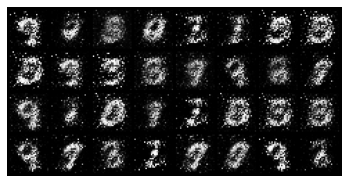

Epoch [31/50] | d_loss: 0.7800 | g_loss: 1.5346
Epoch [32/50] | d_loss: 1.0494 | g_loss: 1.2813
Epoch [33/50] | d_loss: 0.9390 | g_loss: 1.5112
Epoch [34/50] | d_loss: 0.7792 | g_loss: 1.5294
Epoch [35/50] | d_loss: 0.9897 | g_loss: 1.2580
Epoch [36/50] | d_loss: 0.8283 | g_loss: 1.6789
Epoch [37/50] | d_loss: 1.1578 | g_loss: 1.6303
Epoch [38/50] | d_loss: 1.0006 | g_loss: 1.2443
Epoch [39/50] | d_loss: 1.0083 | g_loss: 2.0311
Epoch [40/50] | d_loss: 0.8755 | g_loss: 1.3992


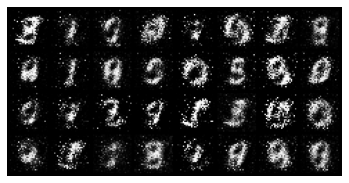

Epoch [41/50] | d_loss: 0.7633 | g_loss: 1.4982
Epoch [42/50] | d_loss: 1.1521 | g_loss: 1.3594
Epoch [43/50] | d_loss: 0.8869 | g_loss: 1.7322
Epoch [44/50] | d_loss: 1.2261 | g_loss: 1.2014
Epoch [45/50] | d_loss: 1.0959 | g_loss: 1.1667
Epoch [46/50] | d_loss: 1.3153 | g_loss: 1.1356
Epoch [47/50] | d_loss: 1.1292 | g_loss: 0.9856
Epoch [48/50] | d_loss: 1.2202 | g_loss: 1.4136
Epoch [49/50] | d_loss: 1.2416 | g_loss: 1.5778
Epoch [50/50] | d_loss: 1.1918 | g_loss: 1.2553


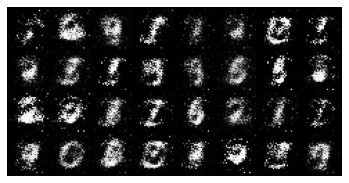

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Generator
class Generator(nn.Module):
    def __init__(self, z_dim, image_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, image_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.gen(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, image_dim):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            nn.Linear(image_dim, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)

# Define the noise schedule for Stable Diffusion
def noise_schedule(epoch, num_epochs, z_dim):
    t = epoch / num_epochs
    alpha = 1.0 - t
    sigma = (alpha * 0.01) + (t * 0.1)
    return torch.randn(batch_size, z_dim, 1, 1) * sigma  # Adjust dimensions here

# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 0.0002
z_dim = 64
image_dim = 28 * 28
batch_size = 64
num_epochs = 50

# Create the Generator and Discriminator
generator = Generator(z_dim, image_dim).to(device)
discriminator = Discriminator(image_dim).to(device)

# Loss and optimizers
criterion = nn.BCELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr)
g_optimizer = optim.Adam(generator.parameters(), lr=lr)

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root='mnist_data', train=True, transform=transform, download=True)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(data_loader):
        real_images = real_images.view(-1, image_dim).to(device)
        batch_size = real_images.shape[0]

        # Discriminator forward pass
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        d_real = discriminator(real_images)
        d_real_loss = criterion(d_real, real_labels)

        # Generate fake images
        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = generator(z)

        # Calculate noise for Stable Diffusion
        noise = noise_schedule(epoch, num_epochs, z_dim).to(device)

        d_fake = discriminator(fake_images.detach())
        d_fake_loss = criterion(d_fake, fake_labels)

        d_loss = d_real_loss + d_fake_loss

        # Discriminator backward pass and optimization
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Generator forward pass
        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = generator(z)

        # Calculate noise for Stable Diffusion
        noise = noise_schedule(epoch, num_epochs, z_dim).to(device)

        d_fake = discriminator(fake_images)
        g_loss = criterion(d_fake, real_labels)

        # Generator backward pass and optimization
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    # Print and log training information
    print(f"Epoch [{epoch+1}/{num_epochs}] | d_loss: {d_loss.item():.4f} | g_loss: {g_loss.item():.4f}")

    # Generate and save sample images
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            fake_samples = generator(torch.randn(batch_size, z_dim).to(device))
            fake_grid = fake_samples.view(-1, 1, 28, 28)
            fake_grid = make_grid(fake_grid, normalize=True)
            plt.imshow(fake_grid.permute(1, 2, 0).cpu().numpy(), cmap='gray')
            plt.axis('off')
            plt.show()

# Save the trained generator
torch.save(generator.state_dict(), 'generator.pth')
